In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings
import argparse

In [2]:
# Read the Parquet file into a DataFrame
df = pd.read_parquet('../uncon_trained_models/crystal500k_25M_2048/crystal_5.eval')
ar = np.stack(df.iloc[:]['descriptors.xrd_sample.iq'])
df

,cif,spacegroup,index,rep,Dataset,Model,seq_len,status,syntax_validity.formula_consistency,syntax_validity.atom_site_multiplicity,...,cell_params.implied_vol,cell_params.gen_vol,descriptors.xrd_gen.q,descriptors.xrd_gen.iq,descriptors.xrd_sample.q,descriptors.xrd_sample.iq,descriptors.soap_gen,descriptors.soap_sample,descriptors.acsf_gen,descriptors.acsf_sample
0,data_Sr4Gd4Tm4\n_symmetry_space_group_name_H-M...,P6_3/mmc,0,0,crystal_5,DefaultModel,248,success,True,False,...,347.907737,395.31440,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[8.187683450746056e-79, 3.4052520045497944e-77...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 3.4765625, 0.0, 0.0,..."
1,data_Li16P62N14N9\n_symmetry_space_group_name_...,Pnna,3,0,crystal_5,DefaultModel,475,success,False,False,...,1781.334799,463.47147,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[1.6302421786050783e-36, 2.0102527932365026e-3...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.5049684796465357, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 2.7011719, 0.0, 0.0, 0.0, 0.0, 0.0, 7.07..."
2,data_Ce1Al3Ge6Pd1\n_symmetry_space_group_name_...,Pm-3m,2,0,crystal_5,DefaultModel,289,success,False,False,...,123.275492,924.20750,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[3.6495854368582506e-139, 5.580743891979268e-1...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


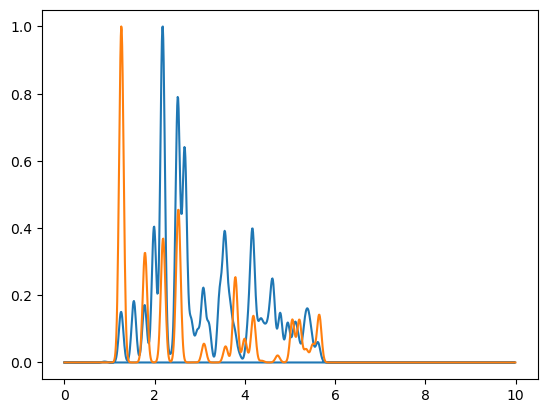

In [3]:
plt.plot(df.iloc[2]['descriptors.xrd_sample.q'], df.iloc[2]['descriptors.xrd_sample.iq'])
plt.plot(df.iloc[2]['descriptors.xrd_gen.q'], df.iloc[2]['descriptors.xrd_gen.iq'])
plt.show()

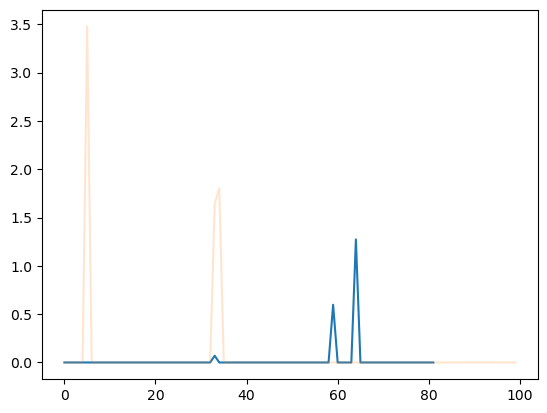

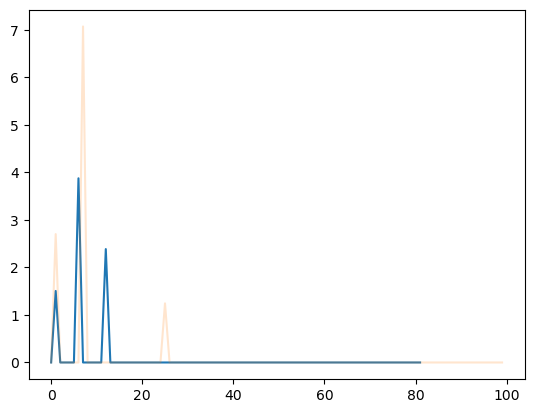

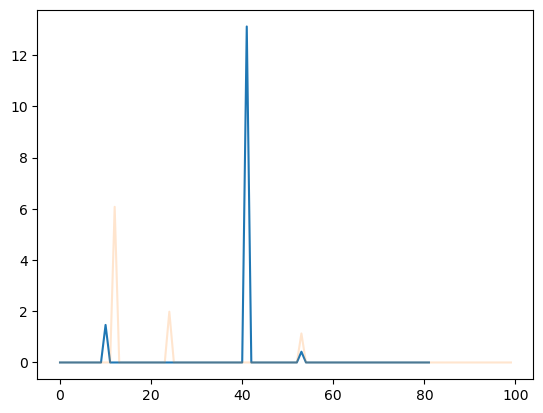

In [4]:

for i, sample in enumerate(df.iloc):
    fig = plt.figure()
    a = plt.plot(sample['descriptors.acsf_gen'][:100])
    plt.plot(sample['descriptors.acsf_sample'][:100], alpha=0.2)
plt.show()

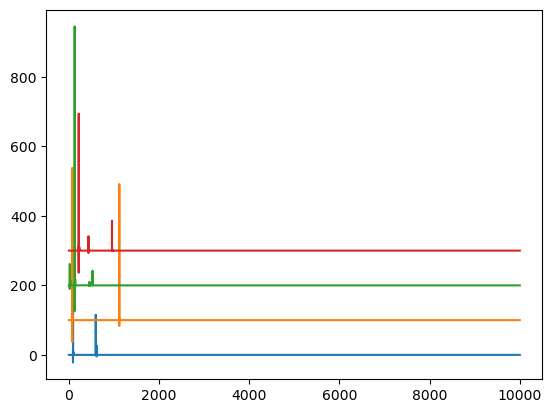

In [5]:
fig = plt.figure()
for i, sample in enumerate(df.iloc):
    plt.plot(sample['descriptors.soap_sample'] + i*100)
plt.show()

In [22]:
from pymatgen.core import Composition
from decifer import extract_formula_nonreduced

set(Composition(extract_formula_nonreduced(df.iloc[0]['cif'])).as_dict().keys())

{'O', 'Pt', 'S'}

[ True  True  True]
['Pt', 'Ac', 'Cr']
(1, 147)


/home/frjo/miniconda3/envs/decifer_env/lib/python3.9/site-packages/pymatgen/io/cif.py:1257: UserWarning: The default value of primitive was changed from True to False in https://github.com/materialsproject/pymatgen/pull/3419. CifParser now returns the cell in the CIF file as is. If you want the primitive cell, please set primitive=True explicitly.
  warnings.warn(


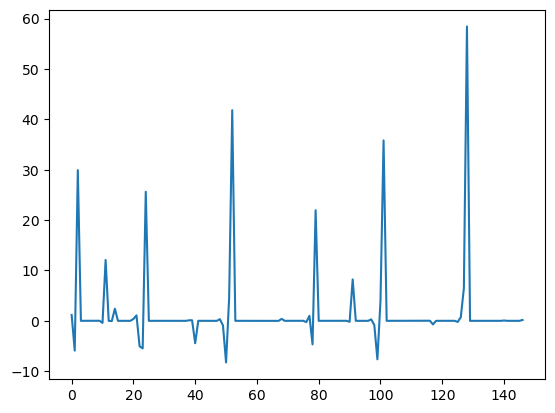

In [3]:
from pymatgen.io.cif import CifParser#, parse_structures
try:
    from_string = CifParser.from_str
except:
    from_string = CifParser.from_string
from dscribe.descriptors import SOAP

# Load the crystal structure
cif = df.iloc[2]['cif']
structure = from_string(cif).parse_structures()[0]
ase_structure = structure.to_ase_atoms()
print(ase_structure.pbc)
# Define species and parameters
species = list(set([str(site.specie) for site in structure]))
print(species)
soap = SOAP(
    species=species,
    r_cut=5.0,
    n_max=2,
    l_max=6,
    periodic=True,
    sparse=False
)

# Compute the SOAP descriptors
soap_descriptors = soap.create(ase_structure, centers=[0])
print(soap_descriptors.shape)

plt.plot(soap_descriptors[0])

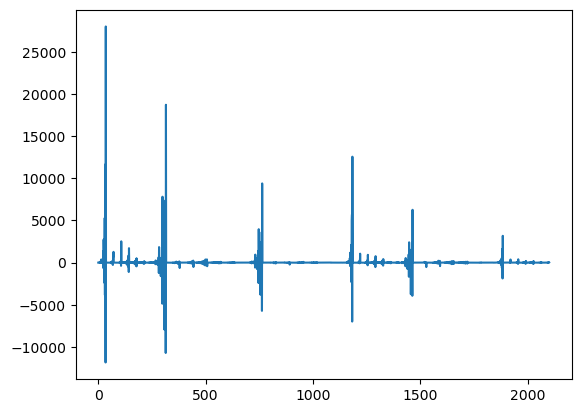

In [40]:
plt.plot(soap.create_single(ase_structure).sum(axis=0))

In [47]:
soap.derivatives(ase_structure)

AttributeError: 'tuple' object has no attribute 'shape'

In [30]:
from dscribe.descriptors import SOAP

species = ["H", "C", "O", "N"]
r_cut = 6.0
n_max = 2
l_max = 1

# Setting up the SOAP descriptor
soap = SOAP(
    species=species,
    periodic=False,
    r_cut=r_cut,
    n_max=n_max,
    l_max=l_max,
)

from ase.build import molecule

# Molecule created as an ASE.Atoms
water = molecule("H2O")

# Create SOAP output for the system
soap_water = soap.create(water, centers=[0])

# print(soap_water)
print(soap_water.shape)

(1, 72)


NameError: name 'from_string' is not defined

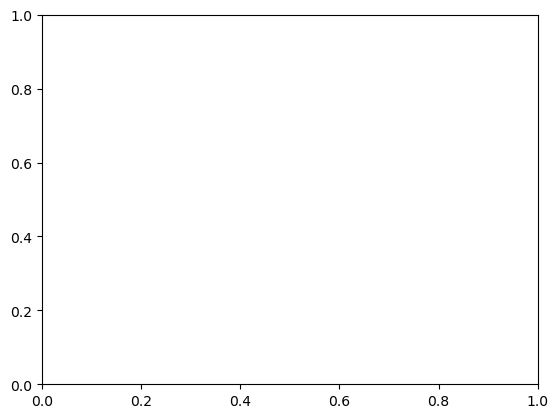

In [31]:
from pymatgen.core import Structure
from dscribe.descriptors import MBTR

fig, ax = plt.subplots()

for line in df.iloc:
    
    if line['syntax_validity.atom_site_multiplicity']:
        cif = line['cif']

        # Load your crystal structure
        structure = from_string(cif).parse_structures()[0]

        # Convert pymatgen Structure to ASE Atoms object
        ase_structure = structure.to_ase_atoms()

        # Define the species present in your structure
        species = list(set([str(site.specie) for site in structure]))
        print(species)

        # Set up MBTR with the new syntax
        mbtr = MBTR(
            species=species,
            geometry={
                "function": "inverse_distance",  # Geometry function for K=2
            },
            grid={"min": 0, "max": 0.5, "sigma": 0.01, "n": 200},
            weighting={
                "function": "exp",
                "scale": 0.5,
                "threshold": 1e-3,
            },
            periodic=True,
            normalization="l2",
        )

        # Compute the MBTR descriptor
        mbtr_descriptor = mbtr.create(ase_structure)

        ax.plot(mbtr_descriptor)

# print(mbtr_descriptor)
# print(mbtr_descriptor.shape)


In [58]:
from dscribe.descriptors import ACSF

cif = df.iloc[2]['cif']
structure = from_string(cif).parse_structures()[0]
ase_structure = structure.to_ase_atoms()

# Extract all unique atomic species from the structure
species = list(set([str(site.specie) for site in structure]))
print("Species in structure:", species)

acsf = ACSF(
    species=species,
    r_cut=6.0,
    periodic=True,
)

acsf_descriptor = acsf.create(ase_structure, centers=[0])
acsf_descriptor

Species in structure: ['Al', 'Hg', 'Mn']


array([[4.32915729, 1.12940154, 2.38223618]])